/Users/benchan/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


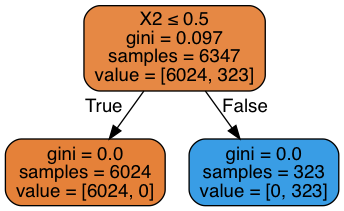

In [3]:
import os
import pickle
import time
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from sklearn import preprocessing

#%% data exploration for existing parameters

raw_df = pd.read_excel("./Churn+Case+Data+UVAQA0806X.xlsx", sheetname="Case Data")

#%% chanllenges 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#%% build decision tree
features = ['ID', 'Customer Age (in months)', 'Churn (1 = Yes, 0 = No)',
       'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
       'Blog Articles 0-1', 'Views 0-1', ' Days Since Last Login 0-1']

feature_matrix = raw_df[features]

churn_result = raw_df['Churn (1 = Yes, 0 = No)']

dt_cla = DecisionTreeClassifier()

dt_cla = dt_cla.fit(feature_matrix, churn_result)

#%% plot decision tree

dot_data = StringIO()
export_graphviz(dt_cla, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

/Users/benchan/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


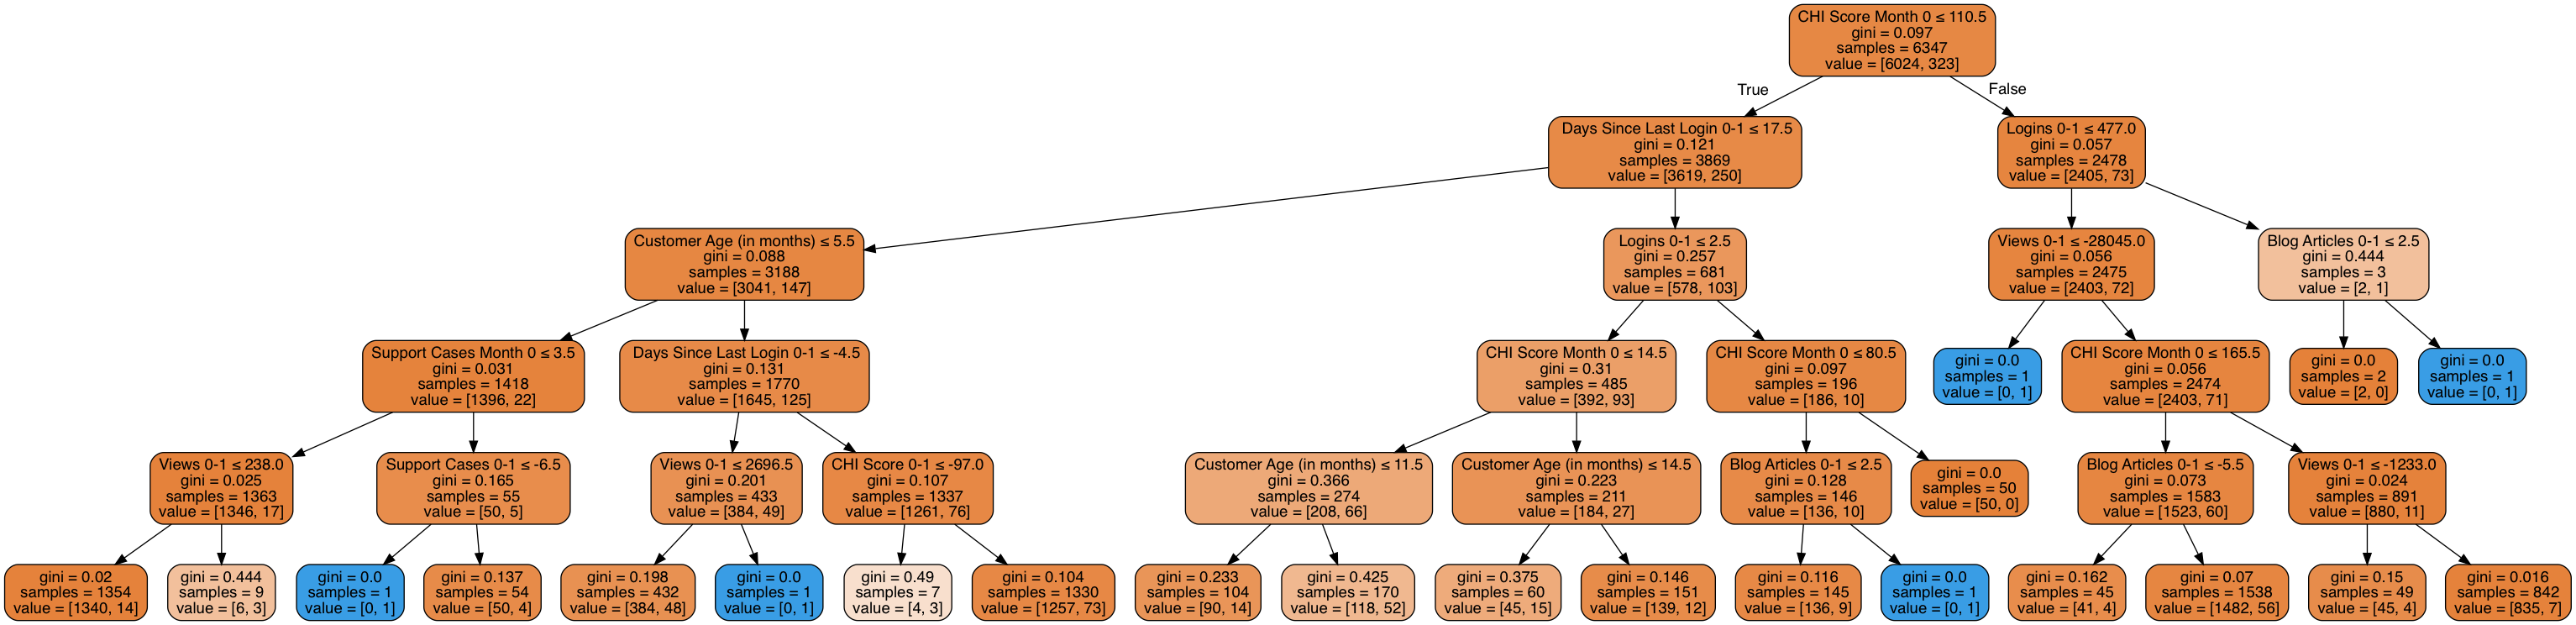

In [9]:
import os
import pickle
import time
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from sklearn import preprocessing

#%% data exploration for existing parameters

raw_df = pd.read_excel("./Churn+Case+Data+UVAQA0806X.xlsx", sheetname="Case Data")

#%% chanllenges 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#%% build decision tree
features = ['Customer Age (in months)', 'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
       'Blog Articles 0-1', 'Views 0-1', ' Days Since Last Login 0-1']

feature_matrix = raw_df[features]

churn_result = raw_df['Churn (1 = Yes, 0 = No)']

dt_cla = DecisionTreeClassifier(max_depth=5, max_features=5)

dt_cla = dt_cla.fit(feature_matrix, churn_result)

feat_importance = dt_cla.tree_.compute_feature_importances(normalize=False)

#%% plot decision tree

dot_data = StringIO()
out = export_graphviz(dt_cla, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                     feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())
    
#%% other solution

# out = export_graphviz(dt_cla, out_file=r'C:\Users\s1883483\Desktop\2018 Rotman Datathon\output')

In [7]:
dt_cla

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')